In [14]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [3]:
# DATAFRAMES
#Engagement Data
# "data/most_emailed_comments.csv"
# "data/most_viewed_comments.csv"
# "data/most_shared_comments.csv"

# Engagement Analysis

In [64]:
#Load files
period = 30
date = '041320' # '041320'
most_emailed_df = pd.read_csv(f'data/most_emailed_comments.csv',index_col ='asset_id')
most_viewed_df = pd.read_csv(f'data/most_viewed_comments.csv',index_col ='asset_id')
most_shared_df = pd.read_csv(f'data/most_shared_comments.csv',index_col ='asset_id')

most_emailed_df = most_emailed_df[['title','adx_keywords','published_date','url','first_keyword','about_covid19','Total Comments_x']]
most_emailed_df.rename(columns = {'Total Comments_x':'total_comments'}, inplace = True)
most_viewed_df = most_viewed_df[['title','adx_keywords','published_date','url','first_keyword','about_covid19','Total Comments']]
most_viewed_df.rename({'Total Comments':'total_comments'}, inplace = True)
most_shared_df = most_shared_df[['title','adx_keywords','published_date','url','first_keyword','about_covid19','Total Comments']]
most_shared_df.rename({'Total Comments':'total_comments'}, inplace = True)


most_shared_df.head()

,title,adx_keywords,published_date,url,first_keyword,about_covid19,Total Comments
asset_id,,,,,,,
100000001662729,The Ecology of Disease,West Nile Virus;Nipah Virus;Livestock Diseases...,2012-07-14,https://www.nytimes.com/2012/07/15/sunday-revi...,False,False,114
100000007029870,"He Has 17,700 Bottles of Hand Sanitizer and No...","Coronavirus (2019-nCoV);Prices (Fares, Fees an...",2020-03-14,https://www.nytimes.com/2020/03/14/technology/...,True,True,4408
100000007041499,Younger Adults Make Up Big Portion of Coronavi...,Coronavirus (2019-nCoV);your-feed-healthcare;E...,2020-03-18,https://www.nytimes.com/2020/03/18/health/coro...,True,True,0
100000007041449,Coronavirus Ravages 7 Members of a Single Fami...,Coronavirus (2019-nCoV);Quarantines;Deaths (Fa...,2020-03-18,https://www.nytimes.com/2020/03/18/nyregion/ne...,True,True,596
100000007043943,Is Our Fight Against Coronavirus Worse Than th...,Quarantines;Coronavirus (2019-nCoV);Shutdowns ...,2020-03-20,https://www.nytimes.com/2020/03/20/opinion/cor...,False,True,0


In [40]:
no_true_emailed = most_emailed_df['about_covid19'].value_counts()[True]
no_false_emailed = most_emailed_df['about_covid19'].value_counts()[False]

no_true_viewed = most_viewed_df['about_covid19'].value_counts()[True]
no_false_viewed = most_viewed_df['about_covid19'].value_counts()[False]

no_true_shared = most_shared_df['about_covid19'].value_counts()[True]
no_false_shared = most_shared_df['about_covid19'].value_counts()[False]

no_true = np.average([no_true_emailed,no_true_viewed,no_true_shared])
no_false = np.average([no_false_emailed,no_false_viewed,no_false_shared])

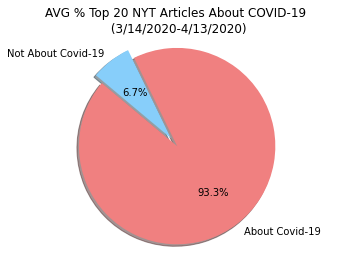

In [41]:
# Labels for the sections of our pie chart
labels = ["About Covid-19","Not About Covid-19"]

# The values of each section of the pie chart
sizes = [no_true,no_false]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("AVG % Top 20 NYT Articles About COVID-19 \n (3/14/2020-4/13/2020)")
# Save an image of our chart and print the final product to the screen
output_file = "images/top_20_engaged_aboutcovid19_pie.png"
plt.savefig(output_file, metadatadict={"Created By":"Erendiz Tarakci"})
plt.show()

In [52]:
# most_emailed_covid19_df = most_emailed_df[most_emailed_df['about_covid19'] == True]
# most_viewed_covid19_df = most_viewed_df[most_viewed_df['about_covid19'] == True]
# most_shared_covid19_df = most_shared_df[most_shared_df['about_covid19'] == True]

no_true_covid19_emailed = most_emailed_df['first_keyword'].value_counts()[True]
no_false_covid19_emailed = most_emailed_df['first_keyword'].value_counts()[False]

no_true_covid19_viewed = most_viewed_df['first_keyword'].value_counts()[True]
no_false_covid19_viewed = most_viewed_df['first_keyword'].value_counts()[False]

no_true_covid19_shared = most_shared_df['first_keyword'].value_counts()[True]
no_false_covid19_shared = most_shared_df['first_keyword'].value_counts()[False]

no_true_covid19 = np.average([no_true_covid19_emailed,no_true_covid19_viewed,no_true_covid19_shared])
no_false_covid19 = np.average([no_false_covid19_emailed,no_false_covid19_viewed,no_false_covid19_shared])

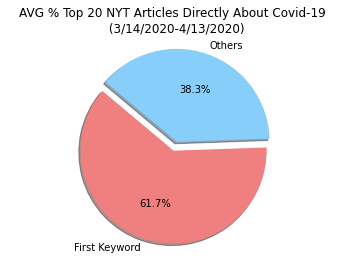

In [54]:
# Labels for the sections of our pie chart
labels = ["First Keyword","Others"]

# The values of each section of the pie chart
sizes = [no_true_covid19,no_false_covid19]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("AVG % Top 20 NYT Articles Directly About Covid-19 \n (3/14/2020-4/13/2020)")
# Save an image of our chart and print the final product to the screen
output_file = "images/top_20_engaged_first_key_covid19_pie.png"
plt.savefig(output_file, metadatadict={"Created By":"Erendiz Tarakci"})
plt.show()

In [20]:
# #Load files
# period = 30
# date = '041320' # '041320'
# most_emailed_pub_df = pd.read_csv(f'data/most_emailed_pubcount_{period}_{date}.csv',index_col='Published Date')
# most_viewed_pub_df = pd.read_csv(f'data/most_viewed_pubcount_{period}_{date}.csv',index_col='Published Date')
# most_shared_pub_df = pd.read_csv(f'data/most_shared_pubcount_{period}_{date}.csv',index_col='Published Date')

# most_engaged_pub_df = pd.concat([most_emailed_pub_df, most_viewed_pub_df,
#                                  most_shared_pub_df]).groupby('Published Date').sum().reset_index()
# most_engaged_pub_df.head()

,Published Date,Number Articles
0,2012-07-14,1
1,2020-03-12,1
2,2020-03-13,1
3,2020-03-14,2
4,2020-03-15,2


In [66]:
# Create the X and Y axis lists
most_emailed_df.index=pd.to_datetime(most_emailed_df.index)

most_viewed_df.index=pd.to_datetime(most_viewed_df.index)

most_shared_df.index=pd.to_datetime(most_viewed_df.index)

In [68]:
# x_values = most_emailed_df.index
# y_values = most_emailed_df['total_comments']
# plt.scatter(x_values,y_values,color = "red")
# plt.show()

#comments on COVID19 articles over time

# x_values = most_viewed_df.index
# y_values = most_viewed_df['total_comments']      
# plt.scatter(x_values,y_values,color = "blue")
# plt.show()

# x_values = most_shared_df.index
# y_values = most_shared_df['total_comments']      
# plt.scatter(x_values,y_values,color = "green")
# plt.show()



# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(20,35),fontsize=15,color="red",annotation_clip=False)

# plt.title("Number Top NYT Articles Published per Date \n (3/14/2020-4/13/2020)")
# plt.xlabel("Published Date")
# plt.ylabel("Number Articles")
# #plt.xticks(rotation=45)

# # Save an image of our chart and print the final product to the screen
# output_file = "images/top_engaged_bydate_scatter.png"
# plt.savefig(output_file, metadatadict={"Created By":"Erendiz Tarakci"})
# plt.show()